In [5]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkplot
import thinkstats2


Read pregnancy data into dataframe

In [6]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]   # get the live pregnancy data into data frame

Graphical comparison of pregnancy length of the first baby and other babies 

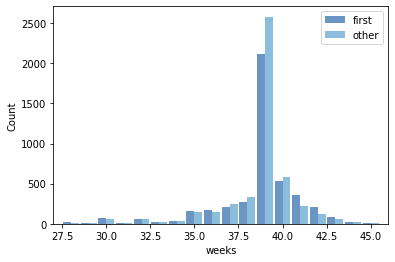

In [7]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])


We aren't getting a clear idea from this hitogram comparison whether pregenancy length for first babies are more or not. So I want to take the help of summary statistics and find out the mean and standard deviation of both groups: first baby and others.

In [10]:
print('Average first pregnancy length in weeks:', firsts.prglngth.mean())
print('First pregnancy standard deviation in weeks:', firsts.prglngth.std())
print('Average other pregnancy length in weeks:', others.prglngth.mean())
print('Other pregnancy standard deviation in weeks:', others.prglngth.std())

Average first pregnancy length in weeks: 38.60095173351461
First pregnancy standard deviation in weeks: 2.7919014146686947
Average other pregnancy length in weeks: 38.52291446673706
Other pregnancy standard deviation in weeks: 2.615852350439255


In [12]:
''' Function to calculate Cohen's d
'''
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [13]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

Based on the mean pregnancy length of both the groups we can say that first babies come late than other babies. But it's not signifianctly more as we can see from Cohen's value which is 0.029.

We can tell the mean pregnancy term in weeks based on whether it's her first or other baby. And we can say that pregnancy length may vary by 2.79 weeks or 2.61 weeks according to her number of babies. With both of these data, patient can get an idea when she can expect the baby. Also we can tell her the longest and shortest pregnancy preiod. So that she doesn't get surprised if delivery gets dealyed or labour starts early. 

Based on summary statistics, we can say that fisrt baby arrives late, but it's not significantly different than other babies. From clinical prespective, the pregnancy length doesn't vary much based n first baby or other baby.